Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [37]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for model
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [ ]:
!unzip "/content/drive/MyDrive/PIAIC_ASSIGNMENTS/archive.zip"

Load Data

In [38]:
datadir=Path("/content/flowers")

flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (150,150))
            features.append(img_arr)

flowers
tulip
daisy
dandelion
sunflower
rose


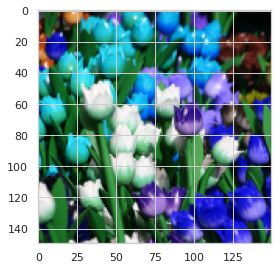

In [39]:
plt.imshow(features[20])
plt.show()



In [40]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

function for Encode labels.

In [41]:
def prep(features, labels):
    features=features.reshape(len(features), 150,150,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

Split into 60 and 40 ratio.
 Encode labels.

In [42]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)


Create Model and compile

In [43]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


In [44]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [45]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

In [46]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
20/20 [==============================] - 12s 596ms/step - loss: 1.6631 - accuracy: 0.2708 - val_loss: 1.4003 - val_accuracy: 0.4035
Epoch 2/50
20/20 [==============================] - 11s 562ms/step - loss: 1.3329 - accuracy: 0.4303 - val_loss: 1.2398 - val_accuracy: 0.4734
Epoch 3/50
20/20 [==============================] - 11s 566ms/step - loss: 1.1747 - accuracy: 0.5079 - val_loss: 1.1475 - val_accuracy: 0.5399
Epoch 4/50
20/20 [==============================] - 12s 600ms/step - loss: 1.1004 - accuracy: 0.5429 - val_loss: 1.0793 - val_accuracy: 0.5809
Epoch 5/50
20/20 [==============================] - 11s 568ms/step - loss: 1.0540 - accuracy: 0.5777 - val_loss: 1.0118 - val_accuracy: 0.6179
Epoch 6/50
20/20 [==============================] - 11s 566ms/step - loss: 0.9497 - accuracy: 0.6225 - val_loss: 1.0153 - val_accuracy: 0.6075
Epoch 7/50
20/20 [==============================] - 11s 571ms/step - loss: 0.9173 - accuracy: 0.6485 - val_loss: 0.9669 - val_accuracy: 0.6121

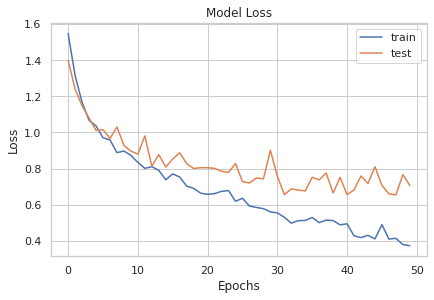

In [47]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

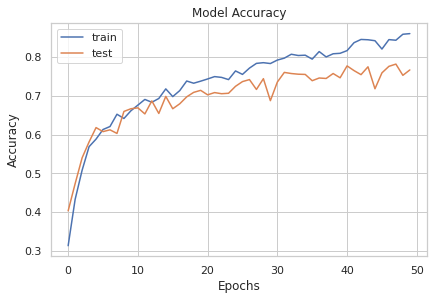

In [48]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [49]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

save model, load and evaluate it

In [50]:
model.save("flowermodel.h5")

In [51]:
model=tf.keras.models.load_model("flowermodel.h5")

In [52]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 1s 8ms/step - loss: 0.7062 - accuracy: 0.7665


[0.7062201499938965, 0.7664740085601807]

In [53]:
model.predict(x_test).sum()

1730.0